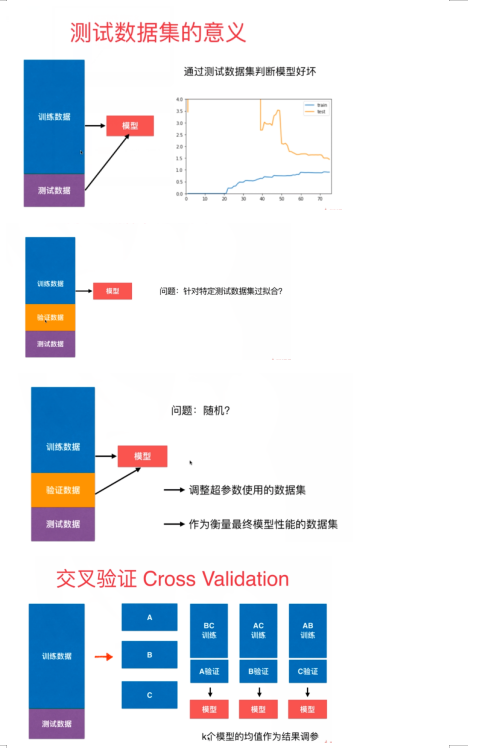

In [1]:
from IPython.display import Image
Image(filename=r"image/x2.png")

# 交叉验证

In [2]:
import numpy as np
from sklearn import datasets

In [3]:
# 加载手写字体数据
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 测试train_test_split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [8]:
%%time
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p = p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
print("Best K = ", best_k)
print("Best P = ", best_p)
print("Best K\score = ", best_score)

Best K =  3
Best P =  4
Best K\score =  0.9860917941585535
Wall time: 35.2 s


## 使用交叉验证

In [9]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.98895028, 0.97777778, 0.96629213])

In [11]:
best_score, best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p = p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
print("Best K = ", best_k)
print("Best P = ", best_p)
print("Best K\score = ", best_score)

c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\mo

KeyboardInterrupt: 

In [12]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)

In [13]:
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.980528511821975

## 使用网格搜索

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights':['diatance'],
        'n_neighbors':[i for i in range(2, 11)],
        'p':[i for i in range(1, 6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


c:\users\s2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: weights not recognized: should be 'uniform', 'distance', or a callable function

In [15]:
grid_search.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [16]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [17]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

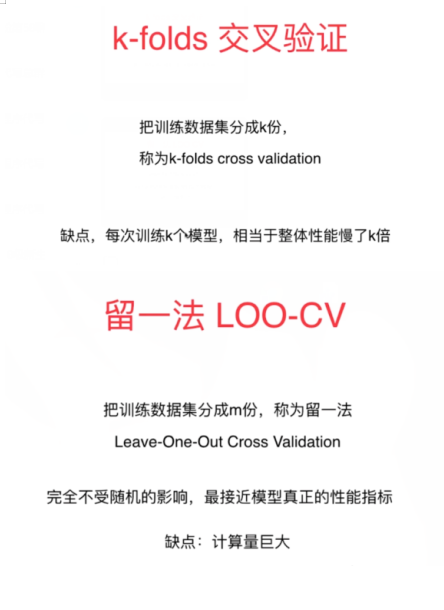

In [18]:
from IPython.display import Image
Image(filename=r"image/x3.png")